Path with Manhattan Distance: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


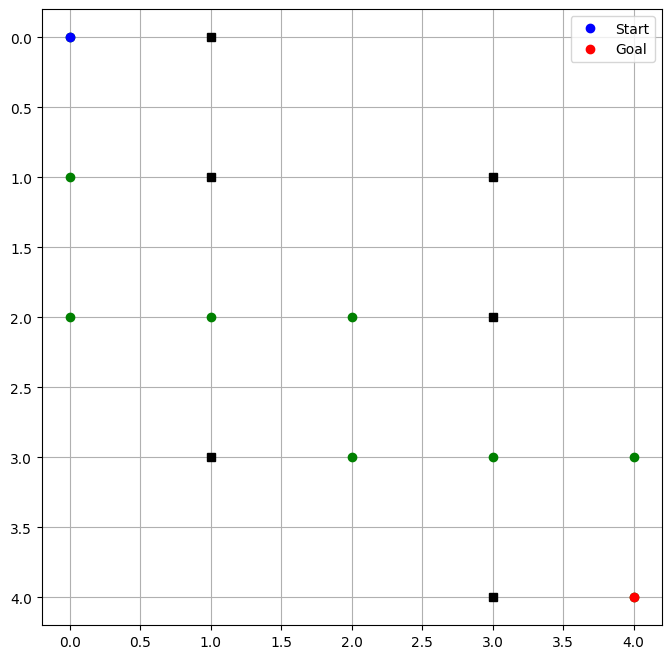

Path with Diagonal Distance: [(0, 0), (1, 0), (2, 1), (2, 2), (3, 3), (4, 4)]


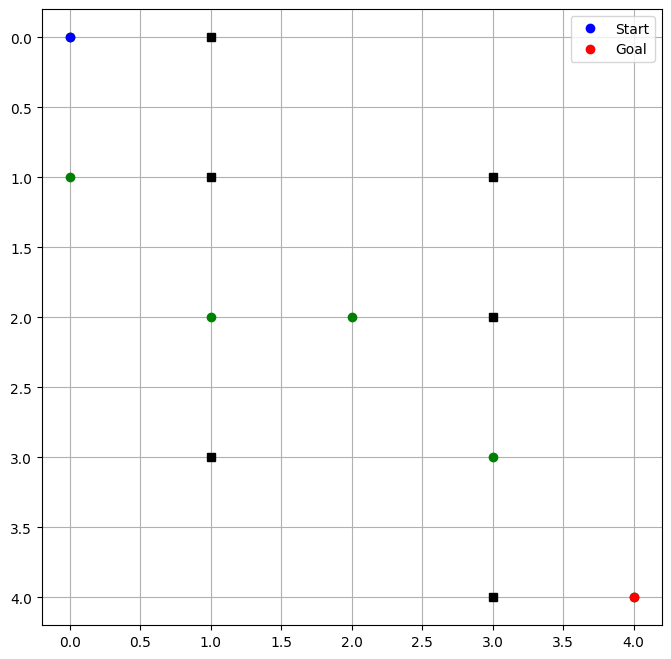

In [1]:
import heapq
import matplotlib.pyplot as plt
from collections import defaultdict

# Priority Queue for openSet
class PriorityQueue():
    def __init__(self):
        self.heap = []

    def enqueue(self, item, priority):
        heapq.heappush(self.heap, (priority, item))

    def dequeue(self):
        return heapq.heappop(self.heap)[1]

    def isEmpty(self):
        return len(self.heap) == 0

# Reconstruct path from start to goal
def reconstructPath(parent, start, goal):
    current = goal
    full_path = []
    while current != start:
        full_path.append(current)
        current = parent[current]
    full_path.append(start)
    return full_path[::-1]  # Reverse the path to start -> goal

# Get valid neighbors of the current node
def neighbors(node, grid, allow_diagonal=False):
    x, y = node
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    if allow_diagonal:
        directions += [(-1, -1), (-1, 1), (1, -1), (1, 1)]  # Diagonals

    valid_neighbors = []
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] == 0:
            valid_neighbors.append((nx, ny))
    return valid_neighbors

# Manhattan Distance heuristic
def manhattanDistance(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

# Diagonal Distance heuristic
def diagonalDistance(node, goal):
    return max(abs(node[0] - goal[0]), abs(node[1] - goal[1]))

# A* Search Algorithm
def aStar(grid, start, goal, heuristic, allow_diagonal=False):
    openSet = PriorityQueue()
    openSet.enqueue(start, 0)
    parent = {}
    gScore = defaultdict(lambda: float('inf'))
    gScore[start] = 0
    fScore = defaultdict(lambda: float('inf'))
    fScore[start] = heuristic(start, goal)

    while not openSet.isEmpty():
        current = openSet.dequeue()

        if current == goal:
            return reconstructPath(parent, start, goal)

        for neighbor in neighbors(current, grid, allow_diagonal):
            tentative_gScore = gScore[current] + 1  # Cost from current to neighbor

            if tentative_gScore < gScore[neighbor]:
                parent[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = gScore[neighbor] + heuristic(neighbor, goal)
                openSet.enqueue(neighbor, fScore[neighbor])

    return None  # No path found

# Visualization function
def visualizePath(grid, path, start, goal):
    plt.figure(figsize=(8, 8))
    for x in range(len(grid)):
        for y in range(len(grid[0])):
            if grid[x][y] == 1:  # Obstacle
                plt.plot(y, x, 'ks')  # Black square for obstacles
    if path:
        for (x, y) in path:
            plt.plot(y, x, 'go')  # Path in green
    plt.plot(start[1], start[0], 'bo', label='Start')  # Start in blue
    plt.plot(goal[1], goal[0], 'ro', label='Goal')  # Goal in red
    plt.gca().invert_yaxis()
    plt.legend()
    plt.grid()
    plt.show()

# Example grid, start, and goal
grid = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]
start = (0, 0)
goal = (4, 4)

# Run A* with Manhattan distance
path_manhattan = aStar(grid, start, goal, manhattanDistance, allow_diagonal=False)
print("Path with Manhattan Distance:", path_manhattan)
visualizePath(grid, path_manhattan, start, goal)

# Run A* with Diagonal distance
path_diagonal = aStar(grid, start, goal, diagonalDistance, allow_diagonal=True)
print("Path with Diagonal Distance:", path_diagonal)
visualizePath(grid, path_diagonal, start, goal)
